# Ev Fiyatları Tahmini

## Data Yükleme

#### Bu çalışma ile "Ev Fiyatlarını" özelliklere göre tahmin etmeye çalışacağız.

Öncelikle kullanacağımız kütüphaneleri yükleyelim.

In [119]:
#Kullanacağımız Kütüphaneler.

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sbn

Veri setimizi yükleyelim.

In [2]:
df = pd.read_csv("house_prices.csv");df.head(4)

,Index,Title,Description,Amount(in rupees),Price (in rupees),location,Carpet Area,Status,Floor,Transaction,...,facing,overlooking,Society,Bathroom,Balcony,Car Parking,Ownership,Super Area,Dimensions,Plot Area
0,0,1 BHK Ready to Occupy Flat for sale in Srushti...,"Bhiwandi, Thane has an attractive 1 BHK Flat f...",42 Lac,6000.0,thane,500 sqft,Ready to Move,10 out of 11,Resale,...,NaN,NaN,Srushti Siddhi Mangal Murti Complex,1,2,NaN,NaN,NaN,NaN,NaN
1,1,2 BHK Ready to Occupy Flat for sale in Dosti V...,One can find this stunning 2 BHK flat for sale...,98 Lac,13799.0,thane,473 sqft,Ready to Move,3 out of 22,Resale,...,East,Garden/Park,Dosti Vihar,2,NaN,1 Open,Freehold,NaN,NaN,NaN
2,2,2 BHK Ready to Occupy Flat for sale in Sunrise...,Up for immediate sale is a 2 BHK apartment in ...,1.40 Cr,17500.0,thane,779 sqft,Ready to Move,10 out of 29,Resale,...,East,Garden/Park,Sunrise by Kalpataru,2,NaN,1 Covered,Freehold,NaN,NaN,NaN
3,3,1 BHK Ready to Occupy Flat for sale Kasheli,This beautiful 1 BHK Flat is available for sal...,25 Lac,NaN,thane,530 sqft,Ready to Move,1 out of 3,Resale,...,NaN,NaN,NaN,1,1,NaN,NaN,NaN,NaN,NaN


Veri setimizin sütunları hakkında detaylı bir bilgilendirme alalım.

Veri setimizin kaç satır ve sütundan oluştuğunu kontrol edelim.

In [3]:
df.shape

(187531, 21)

Veri setimizde 187531 kadar satır ve 21 sutün mevcut.

Şimdi ise veri seti üzerinden genel bir bilgi edinelim.

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 187531 entries, 0 to 187530
Data columns (total 21 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Index              187531 non-null  int64  
 1   Title              187531 non-null  object 
 2   Description        184508 non-null  object 
 3   Amount(in rupees)  187531 non-null  object 
 4   Price (in rupees)  169866 non-null  float64
 5   location           187531 non-null  object 
 6   Carpet Area        106858 non-null  object 
 7   Status             186916 non-null  object 
 8   Floor              180454 non-null  object 
 9   Transaction        187448 non-null  object 
 10  Furnishing         184634 non-null  object 
 11  facing             117298 non-null  object 
 12  overlooking        106095 non-null  object 
 13  Society            77853 non-null   object 
 14  Bathroom           186703 non-null  object 
 15  Balcony            138596 non-null  object 
 16  Ca

Yukarıdaki çıktıdan anlaşıldığı kadarı ile, veri setimizde ;3 özellik ondalıklı(float) veri tipinden, 1 özellik sayısal(int) türden, 17 özellik ise nesne(object) veri türünden olmak üzere toplamda 21 özelliğe sahip bir veri kümemiz mevcut.

## Data Temizleme

#### Datamız üzerindeki boş satırları kontrol edelim. Boş olan satırları yüzdelik cinsinden ifade edelim.  



Eksik değer oranlarını hesaplamak için df.isnull().mean() * 100 ifadesini kullanıyoruz.  
Daha sonra, bu hesaplanan değerleri, belirtilen threshold (eşik değerinden) büyük olanları seçmek için bir filtreleme işlemi uyguluyoruz.  
Son olarak, filtrelenmiş kayıp veriyi döndürüyoruz.

In [5]:
def isnull_percent(df,threshold):
    missing_percentage = df.isnull().mean() * 100
    return missing_percentage[missing_percentage > threshold]

isnull_percent(df,0)

Description            1.612000
Price (in rupees)      9.419776
Carpet Area           43.018488
Status                 0.327946
Floor                  3.773776
Transaction            0.044259
Furnishing             1.544811
facing                37.451408
overlooking           43.425354
Society               58.485264
Bathroom               0.441527
Balcony               26.094352
Car Parking           55.114621
Ownership             34.936624
Super Area            57.422506
Dimensions           100.000000
Plot Area            100.000000
dtype: float64

Buradan çıkarılan sonuca göre Dimensions ve Plot Area sütunlarının tamamen boş olduğunu görmekteyiz.  
Ek olarak Index sütunu da bir özellik belirtmediği ve makine öğrenmesini yanlış yönlendireceği için drop etmeyi tercih edebiliriz.  


In [6]:
df.drop(columns=["Dimensions","Plot Area","Index"],inplace=True,axis=1)

In [7]:
isnull_percent(df,0)

Description           1.612000
Price (in rupees)     9.419776
Carpet Area          43.018488
Status                0.327946
Floor                 3.773776
Transaction           0.044259
Furnishing            1.544811
facing               37.451408
overlooking          43.425354
Society              58.485264
Bathroom              0.441527
Balcony              26.094352
Car Parking          55.114621
Ownership            34.936624
Super Area           57.422506
dtype: float64

Ufak ölçüde null değerler olan sözel verilerdeki null değerleri de datamızdan temizliyoruz.

In [8]:
df.dropna(subset=["Furnishing","Status","Transaction","Description"],inplace=True)

Society , facing gibi sütunlar ise çok fazla boş veri barındırmaktadır.   
Ve içerisinde yer alan veriler sözel türden olduğu için belli bir medyan veya ortalamaya göre düzenlenemez.


In [9]:
df.drop(columns=["Society","facing"],inplace=True,axis=1)

Amount(in rupees) kolonu para biriminin hindistan rubisi üzerinden değerini ifade eder.  
Bu datayı temizlemek ve float bir ifade haline getirmek ml modelleri kurmamız için ve datayı iyi analiz edebilmemiz için gereklidir.

In [10]:
isnull_percent(df,0)

Price (in rupees)     9.168931
Carpet Area          41.279519
Floor                 2.875163
overlooking          41.806945
Bathroom              0.030928
Balcony              24.380896
Car Parking          54.194004
Ownership            33.075971
Super Area           58.776813
dtype: float64

#### İçerisinde boş veriler bulunan kolonları tek tek inceleyelim.


###### Amount (in rupees) & Price (in rupees)

In [11]:
df['Amount(in rupees)'].str.extract(r'(\D+)')[0].unique()

array([' Lac ', '.', 'Call for Price', ' Cr '], dtype=object)

In [12]:
df['Amount(in rupees)'][df['Amount(in rupees)'].str.contains(".")]

0          42 Lac 
1          98 Lac 
2         1.40 Cr 
3          25 Lac 
4         1.60 Cr 
            ...   
187526     63 Lac 
187527     55 Lac 
187528     76 Lac 
187529     30 Lac 
187530    1.18 Cr 
Name: Amount(in rupees), Length: 181068, dtype: object

"Lac", aslında bir para birimi değil, bir sayı sistemi birimi veya bir miktarı ifade etmek için kullanılan bir terimdir.  
Özellikle Güney Asya ülkelerinde yaygın olarak kullanılır. 1 Lakh, 100,000 (yüz bin) değerine eşittir.

"Hindistan'da Cr" ifadesi, genellikle "Crore" ifadesini ifade eder.  
"Crore", Güney Asya'da yaygın olarak kullanılan bir terimdir ve 10.000.000 (on milyon) anlamına gelir. Hindistan'da özellikle para birimiyle ilgili olarak sıkça kullanılır.  
Örneğin, "100 Cr" ifadesi "100 Crore" veya "1,000,000,000" (bir milyar) anlamına gelir.

In [13]:
def convert_to_lac(df, col):
    lac = df[col].str.contains("Lac", na=False)
    cr = df[col].str.contains("Cr", na=False)
    call_for_price = df[col].str.contains("Call for Price", na=False)

    df.loc[lac, col] = df.loc[lac, col].str.replace("Lac ", "").astype("float")
    df.loc[cr, col] = df.loc[cr, col].str.replace("Cr ", "").astype("float") * 100
    df.loc[call_for_price, col] = np.nan

    return df[col].astype("float")

# DataFrame'i işleve geçirerek kullanım
df["Price (lakh)"] = convert_to_lac(df, "Amount(in rupees)")
df["Price (lakh)"].head(5)

0     42.0
1     98.0
2    140.0
3     25.0
4    160.0
Name: Price (lakh), dtype: float64

Bu sayede, Cr olan para miktarları Lac cinsinden çevrilmiştir. Tüm para birimleri Lac cinsinden yazılmıştır.   
Str olan veriler float tipinde düzenlenmiştir.   
Call for Price olarak ifade edilen veriler ise nan olarak düzenlenmiştir.  

Amount(in rupees) ve Price (in rupees) sütunları da drop edilebilir.   
Price (lakh) sütunu ev fiyatları için yeterli veriyi float türünden barındırır haldedir.

In [14]:
df["Price (lakh)"].isnull().mean()*100

4.822497625201582

Price içinde yer alan null veriler %4,92'lik bir veriyi kapsar.  
Bu null verileri de datadan temizliyoruz.

In [15]:
df.dropna(subset=["Price (lakh)"],inplace=True)

###### Carpet Area

In [16]:
def units(col):
    return df[col].str.extract(r'(\D+)')[0].unique()

units("Carpet Area")

array([' sqft', nan, ' sqm', ' sqyrd', ' acre', ' ground', ' bigha',
       ' marla', ' kanal'], dtype=object)

Carpet Area içinde yer alan birimler tespit edilir. 

In [17]:
def convert_sqft(df, col):
    sqft = df[col].str.contains("sqft", na=False)
    sqm = df[col].str.contains("sqm", na=False)
    sqyrd = df[col].str.contains("sqyrd", na=False)
    acre = df[col].str.contains("acre", na=False)
    marla = df[col].str.contains("marla", na=False)
    kanal = df[col].str.contains("kanal", na=False)
    ground = df[col].str.contains("ground", na=False)
    cent = df[col].str.contains("cent", na=False)
    bigha = df[col].str.contains("bigha", na=False)
    aankadam = df[col].str.contains("aankadam", na=False)

    df.loc[sqft, col] = df.loc[sqft, col].str.replace("sqft", "").astype("float")
    df.loc[sqm, col] = df.loc[sqm, col].str.replace("sqm", "").astype("float") * 10.7639
    df.loc[sqyrd, col] = df.loc[sqyrd, col].str.replace("sqyrd", "").astype("float") * 9
    df.loc[acre, col] = df.loc[acre, col].str.replace("acre", "").astype("float") * 43560 
    df.loc[marla, col] = df.loc[marla, col].str.replace("marla", "").astype("float") * 272.2 
    df.loc[kanal, col] = df.loc[kanal, col].str.replace("kanal", "").astype("float") * 5445 
    df.loc[ground, col] = df.loc[ground, col].str.replace("ground", "").astype("float") * 2400
    df.loc[cent, col] = df.loc[cent, col].str.replace("cent", "").astype("float") * 435.5 
    df.loc[bigha, col] = df.loc[bigha, col].str.replace("bigha", "").astype("float") * 27000 
    df.loc[aankadam, col] = df.loc[aankadam, col].str.replace("aankadam", "").astype("float") * 72 

    return df[col].astype("float")



In [18]:
df["Carpet Area (in sqft)"] = convert_sqft(df,"Carpet Area")

Öncelikle tüm farklı türden birimleri sqft cinsinden düzenleriz. Ardından Nan olan verileri median ile doldurabiliriz. 



In [19]:
df["Carpet Area (in sqft)"].fillna(df["Carpet Area (in sqft)"].median(),inplace=True)
df["Carpet Area (in sqft)"].head(5)

0    500.0
1    473.0
2    779.0
3    530.0
4    635.0
Name: Carpet Area (in sqft), dtype: float64

###### Overlooking

In [20]:
df["overlooking"].value_counts().head(5)

Main Road                       29271
Garden/Park, Main Road          26305
Garden/Park                     22748
Garden/Park, Pool, Main Road    12261
Pool, Garden/Park, Main Road     3376
Name: overlooking, dtype: int64

In [21]:
df['overlooking'] = df['overlooking'].fillna('')
# Overlooking ifadesinde nan değerleri '' ile doldurduk

In [22]:
df["Main Road"] = df["overlooking"].str.contains("Main Road", na=False).astype(int)
df["Garden/Park"] = df["overlooking"].str.contains("Garden/Park", na=False).astype(int)
df["Pool"] = df["overlooking"].str.contains("Pool", na=False).astype(int)

Overlooking içinde yer alan ibareleri segmentlere ayırıp farklı sütünlara yerleştirdik.  
Main Road özelliği taşır ise 1 , taşımaz ise 0   
Garden/Park barındırıyorsa 1 , barındırmıyorsa 0    
Pool barındırıyorsa 1 değilse 0   

In [23]:
df[["Main Road","Garden/Park","Pool"]].isnull().sum()

Main Road      0
Garden/Park    0
Pool           0
dtype: int64

In [24]:
df.drop(columns="overlooking",inplace=True,axis=1)

Son olarak overlooking sütunu data içerisinden kaldırılır.

###### Super Area

In [25]:
units("Super Area")

array([nan, ' sqft', ' sqm', ',', ' sqyrd', ' marla', ' ground',
       ' aankadam', ' kanal', ' acre', ' cent'], dtype=object)

In [26]:
df["Super Area"].str.contains('biswa2|hectare',regex=True,na=False).sum()

0

In [27]:
index_to_drop = df["Super Area"][df["Super Area"].str.contains('biswa|hectare',regex=True,na=False)].index
index_to_drop.to_list()

[]

Biswa ve hectare birimleri tüm Super Area datası içinde iki kez kullanılmıştır.   
Daha önce kullanmış olduğum convert_sqft fonksiyonu içinde bu birimlere yer vermediğimiz için bu birimlere ait indexleri drop ediyoruz.

In [28]:
df.drop(index=index_to_drop,inplace=True,axis=0)

Super Area sütunu için sqft haricinde yer alan birimler bulunur.   
Virgül bulunan değerler tespit edilir. Virgül barındıran bu değerlerdeki virgül ifadesi kaldırılır.


In [29]:
df["Super Area"][df["Super Area"].str.contains(",",", ",regex=True,na=False)].head(5)

1951    10,000 sqft
1952    15,000 sqft
1967    12,000 sqft
1968    10,000 sqft
2314    15,000 sqft
Name: Super Area, dtype: object

In [30]:
df["Super Area"] = df["Super Area"].str.replace(", ", "").str.replace(",", "")

# Virgül ifadesi tekrar kontrol edilir.
df["Super Area"][df["Super Area"].str.contains(",",", ",regex=True,na=False)]

Series([], Name: Super Area, dtype: object)

Son olarak Super Area içinde yer alan diğer birimler sqft türünde convert edilir.  
Bunun için daha önce hazırlamış olduğumuz convert_sqft fonksiyonunu kullanabiliriz

In [31]:
df["Super Area (in sqft)"] = convert_sqft(df,"Super Area")

In [32]:
df["Super Area (in sqft)"].fillna(df["Super Area (in sqft)"].median(),inplace=True)
df["Super Area (in sqft)"].head(4)

0    1300.0
1    1300.0
2    1300.0
3    1300.0
Name: Super Area (in sqft), dtype: float64

In [33]:
df.drop(columns=["Price (in rupees)","Amount(in rupees)","Carpet Area","Super Area"],inplace=True,axis=1)

###### Car Parking

In [34]:
df["Car Parking"].isnull().mean()*100

53.142697985330976

In [35]:
df["Car Parking"].value_counts().head(4)

1 Covered     36669
1 Covered,    16890
2 Covered     10008
1 Open         7660
Name: Car Parking, dtype: int64

Boş veriler en çok veriye sahip ifade ile doldurulur.

In [36]:
df["Car Parking"].fillna("1 Covered",inplace=True)

In [37]:
df["Cover Parking"] = df["Car Parking"].str.contains("Covered").astype(int)


Kapalı park olan araba parkları tespiti için farklı bir sütun hazırlanır.

In [38]:
units("Car Parking")

array([' Covered', ' Open', ' Covered,'], dtype=object)

Araba park yerleri içinde ki birimler tespit edilip , ortadan kaldırılır.

In [39]:
df['Car Parking'] = df['Car Parking'].str.replace(' Open', '').str.replace(' Covered', '').str.replace(' Covered,', '').str.replace(',', '')

In [40]:
df[["Car Parking","Cover Parking"]].isnull().sum()

Car Parking      0
Cover Parking    0
dtype: int64

In [41]:
df[["Car Parking","Cover Parking"]] = df[["Car Parking","Cover Parking"]].astype(int)

###### Balcony

In [42]:
df["Balcony"].value_counts().head(4)

2    50155
1    44511
3    24848
4     9261
Name: Balcony, dtype: int64

In [43]:
df['Balcony'].replace('> 10', '11',inplace=True)
df['Balcony'].fillna(df['Balcony'].median(), inplace=True)
df['Balcony'] = df['Balcony'].astype(int)


In [44]:
df["Balcony"].value_counts().head(5)

2    92723
1    44511
3    24848
4     9261
5      811
Name: Balcony, dtype: int64

###### Bathroom 

In [45]:
df["Bathroom"].value_counts()

2       85871
3       53144
1       15118
4       14657
5        3237
6         178
7          31
> 10       27
8          12
9           9
10          9
Name: Bathroom, dtype: int64

In [46]:
df['Bathroom'].replace('> 10', '11',inplace=True)
df['Bathroom'].fillna(df['Balcony'].median(), inplace=True)
df['Bathroom'] = df['Balcony'].astype(int)


###### Ownership

In [47]:
df["Ownership"].value_counts()

Freehold                105758
Leasehold                 5067
Co-operative Society      3317
Power Of Attorney         1001
Name: Ownership, dtype: int64

In [48]:
df['Ownership'].replace(np.nan,'Freehold' , inplace=True)

###### Floor                     

In [49]:
df.shape

(172336, 18)

In [50]:
df.dropna(subset=['Floor'],inplace=True)

Öncelikle içerideki data'lar incelenir.   
Ground , Upper Basement ve Lower Basement ifadeleri doğru biçimde sayısallaştırılır.

In [51]:
df["Floor"].value_counts().head(5)

1 out of 4    11626
2 out of 4    11259
3 out of 4     7671
1 out of 3     6591
4 out of 4     5670
Name: Floor, dtype: int64

In [52]:
df["Floor"] = df["Floor"].str.replace("Lower Basement","-1").str.replace("Ground","0").str.replace("Upper Basement","1")


Ardından dairenin bulunduğu kat ve binadaki tüm katlar ayrı sütunlar halinde belirtilir. Isnull veren sütundaki veriler drop edilir.

In [53]:
df[["Floor Location", "Total Floors"]] = df["Floor"].str.split("out of",expand=True)

In [54]:
df.dropna(subset= ["Total Floors"],inplace=True)

In [55]:
df[["Floor Location", "Total Floors"]] = df[["Floor Location", "Total Floors"]].astype(int)

Son olarak Floor sütununa artık ihtiyaç kalınmadığından ötürü drop edilir.

In [56]:
df.drop(columns="Floor",inplace=True)

In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 167157 entries, 0 to 187530
Data columns (total 19 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Title                  167157 non-null  object 
 1   Description            167157 non-null  object 
 2   location               167157 non-null  object 
 3   Status                 167157 non-null  object 
 4   Transaction            167157 non-null  object 
 5   Furnishing             167157 non-null  object 
 6   Bathroom               167157 non-null  int32  
 7   Balcony                167157 non-null  int32  
 8   Car Parking            167157 non-null  int32  
 9   Ownership              167157 non-null  object 
 10  Price (lakh)           167157 non-null  float64
 11  Carpet Area (in sqft)  167157 non-null  float64
 12  Main Road              167157 non-null  int32  
 13  Garden/Park            167157 non-null  int32  
 14  Pool                   167157 non-nu

###### Transaction

In [58]:
df["Transaction"].value_counts()

Resale          129700
New Property     36755
Other              702
Name: Transaction, dtype: int64

## Data Analizi

In [59]:
df.Status.value_counts().count()

1

Ml öğrenimine fayda sağlamayacak Title ve Description verilerini datamızdan kaldırıyoruz.  
Status verisi içinde ise tek bir value yer aldığından (Ready to move) kaldırabiliriz.

In [60]:
df.drop(['Status','Title', 'Description'], axis = 'columns', inplace = True)

Data içinde ki object verileri float'a yada int değerlere dönüştürmek için içindeki etiketlere sayısal bir değer atamak gerekir  
Bunun için LabelEncoder() metodunu kullanırız.  
Str değerlere karşılık gelecek int değerleri bizim için hazırlar.

In [61]:
encoded_df = df.copy()
object_cols = encoded_df.select_dtypes(include="object").columns
# Object verilere ait olan kolonları seçeriz.

from sklearn.preprocessing import LabelEncoder

def label_encode(encoded_df, object_cols):
    encoder = LabelEncoder()
    encoding_dict = {}  # Her bir sütun için eşleştirme sözlüğü
    
    for col in object_cols:
        encoded_labels = encoder.fit_transform(encoded_df[col])
        encoded_df[col] = encoded_labels
        
        # Her bir etiketin atanan sayısal değeri ve orijinal etiketi
        encoding_dict[col] = {label: original_label for label, original_label in zip(encoded_labels, encoder.inverse_transform(encoded_labels))}
        
    return encoded_df , encoding_dict

label_encode(encoded_df, object_cols)


(        location  Transaction  Furnishing  Bathroom  Balcony  Car Parking  \
 0             67            2           2         2        2            1   
 1             67            2           1         2        2            1   
 2             67            2           2         2        2            1   
 3             67            2           2         1        1            1   
 4             67            2           2         2        2            1   
 ...          ...          ...         ...       ...      ...          ...   
 187526        80            0           1         3        3            1   
 187527        80            2           2         2        2            1   
 187528        80            2           0         2        2            1   
 187529        80            2           1         2        2            1   
 187530        80            2           1         4        4            1   
 
         Ownership  Price (lakh)  Carpet Area (in sqft)  Main 

In [62]:
correlation_matrix = encoded_df.corr()["Price (lakh)"]
highest_correlations = correlation_matrix[correlation_matrix != 1].nlargest(10)  # Hedef sütun hariç en yüksek 10 korelasyon

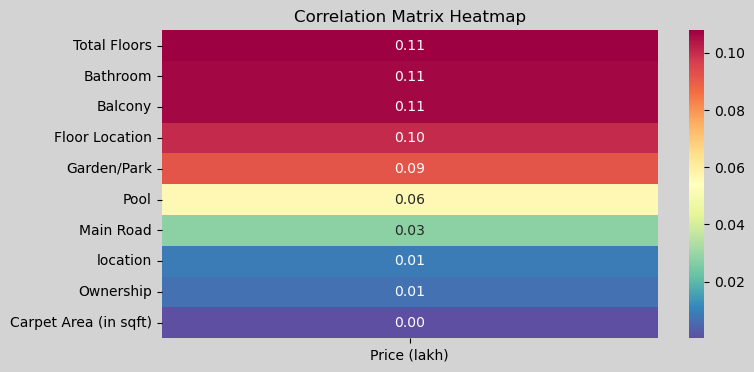

In [63]:
#Korelasyon matrisini görselleştirelim.
highest_correlations_df = pd.DataFrame(data=highest_correlations)
highest_correlations_df


# heatmap içerisinde dataframe kullanmak gereklidir. Bu sebeple öncelikle datayı dataframe olarak düzenledik.

plt.figure(figsize=(8,4),facecolor="lightgrey")
sbn.heatmap(highest_correlations_df, annot=True, cmap='Spectral_r', fmt=".2f")
plt.title("Correlation Matrix Heatmap")
plt.show()

#### Price için en etkili feature'ların Total Floors, Bathroom, Floor, Location, Garden/Park özelliklerini olduğunu gözlemledik.        

## Data Görselleştirme

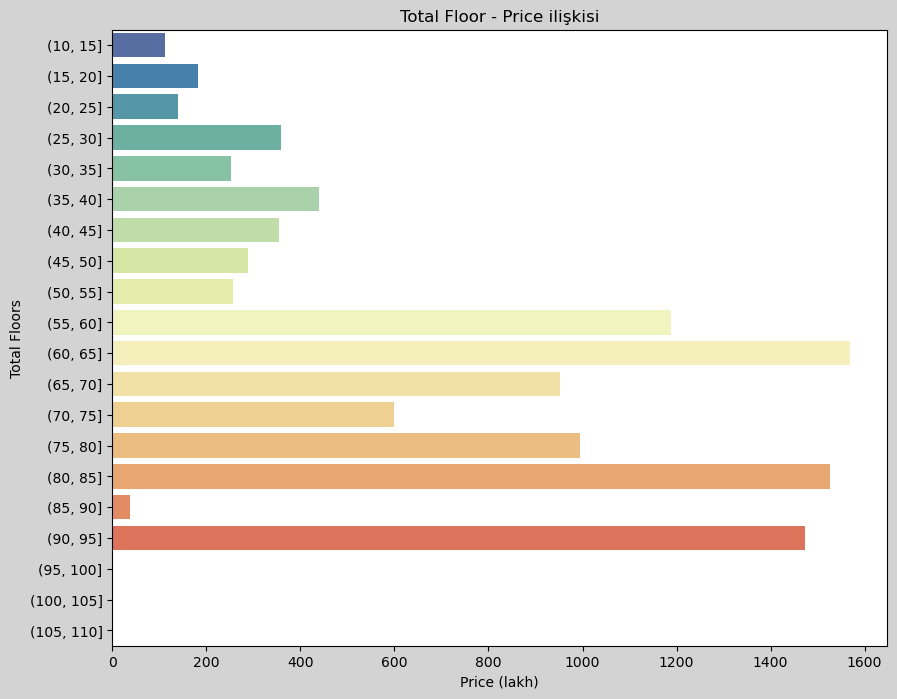

In [64]:
# Binadaki toplam kat sayısının ev fiyatlarına etkisi

total_cut = pd.cut(df['Total Floors'],bins=np.arange(10,115,5))
total_floors_mean = df.groupby(total_cut)["Price (lakh)"].mean().sort_values(ascending=False)

#Çubuk grafiğini oluşturalım.
plt.figure(figsize=(10,8),facecolor='lightgrey')
sbn.barplot(data=df,x=total_floors_mean,y=total_floors_mean.index,orient="h",errwidth=0.1,palette="Spectral_r")

plt.title("Total Floor - Price ilişkisi")
plt.show()

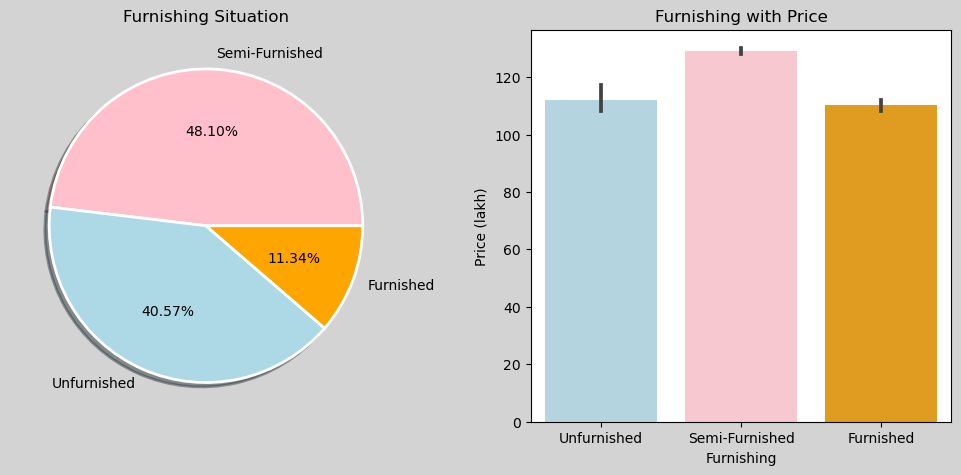

In [65]:
# Evlerin mobilya durumları ve mobilya durumunun fiyatlara etkisi 

fig, axs = plt.subplots(1, 2, figsize=(10, 5),facecolor='lightgrey')

axs[0].pie(df["Furnishing"].value_counts(),labels = ['Semi-Furnished',"Unfurnished",'Furnished'], 
           autopct= "%1.2f%%",shadow=True,colors=["pink","lightblue","orange"],wedgeprops={'edgecolor': '#FFFFFF',"linewidth" : 2})
axs[0].set_title("Furnishing Situation")

sbn.barplot(data=df,x="Furnishing",y="Price (lakh)",ax=axs[1],palette=["lightblue","pink","orange"])
axs[1].set_title("Furnishing with Price")

plt.tight_layout(pad=1.6)

plt.show()


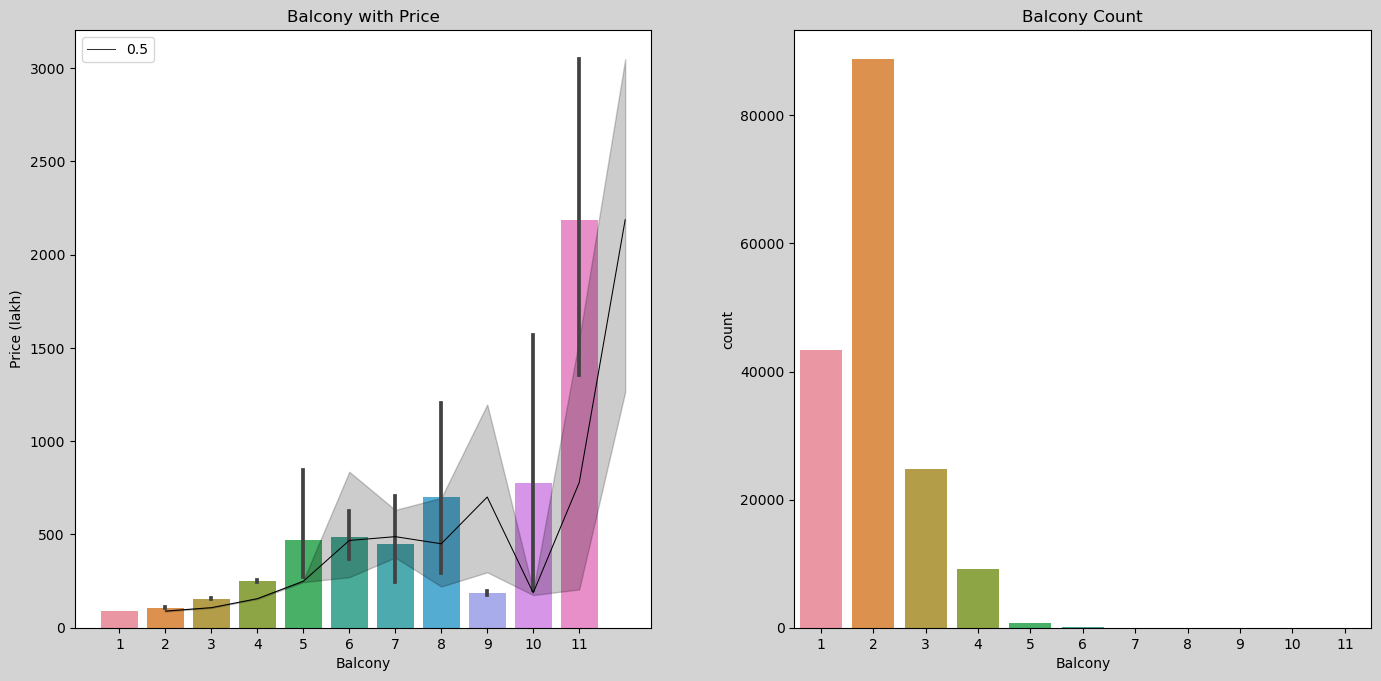

In [66]:
# Evlerdeki ortalama balkon sayıları ve balkon sayılarının ev fiyatlarına etkisi 

fig , ax = plt.subplots(1,2,figsize=(15,8),facecolor='lightgrey')


sbn.barplot(data=df,x="Balcony",y="Price (lakh)",ax=ax[0])
ax[0].set_title("Balcony with Price")
sbn.lineplot(data=df, x="Balcony", y="Price (lakh)", ax=ax[0], color='black',size=0.5,)

sbn.countplot(data=df,x="Balcony",ax=ax[1])
ax[1].set_title("Balcony Count")

plt.tight_layout(pad=5)

plt.show()

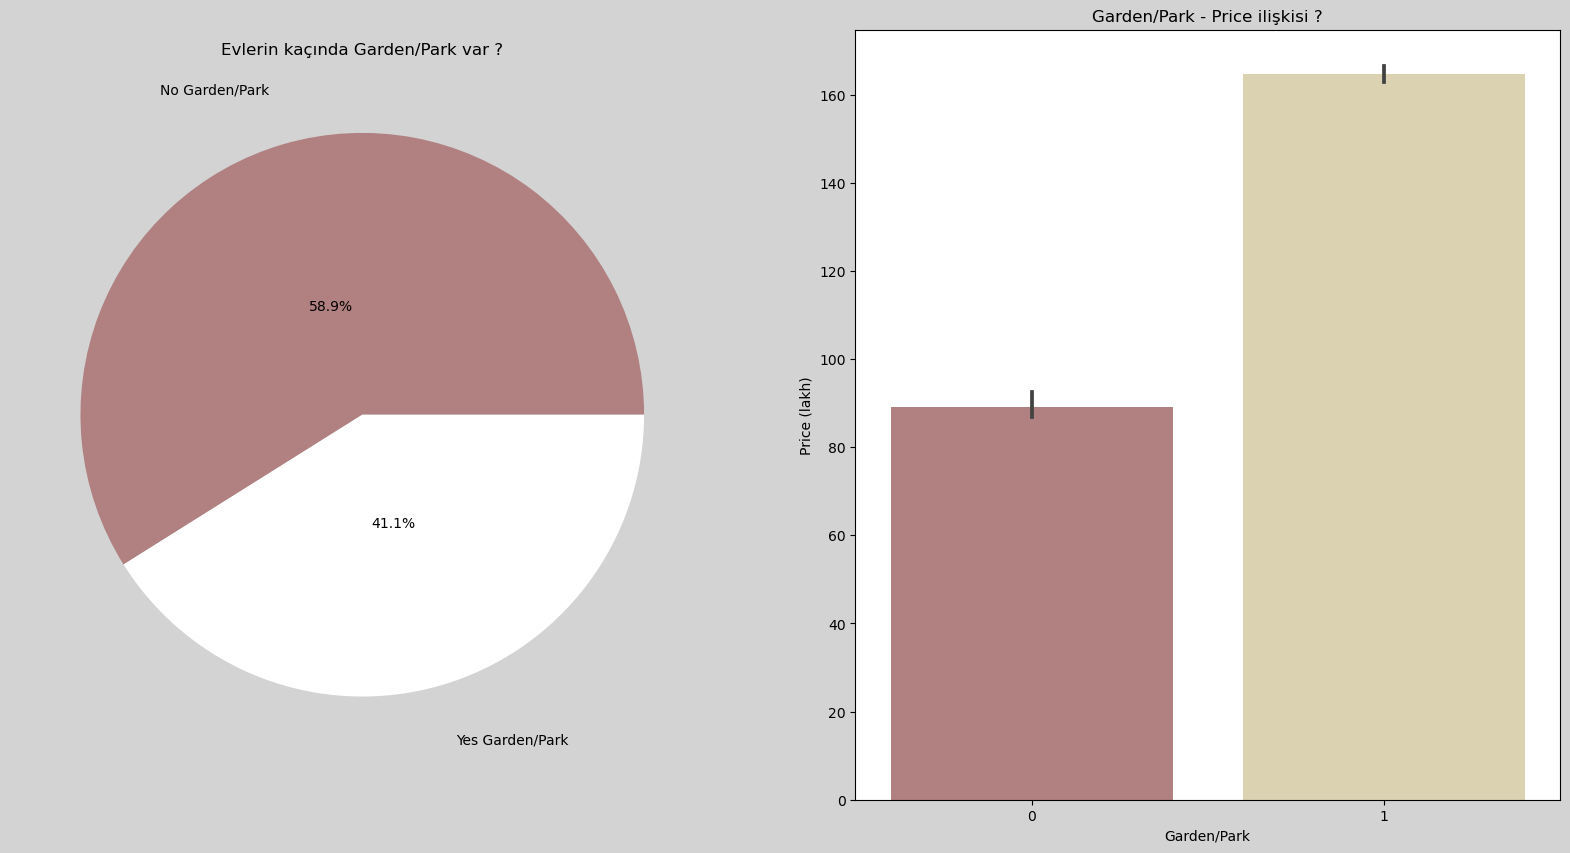

In [67]:
# Evlerin kaçı Garden/Park sahibi ? Fiyaytları etkilemiş mi ?

fig ,ax = plt.subplots(1,2,figsize=(20,10),facecolor='lightgrey')


ax[0].pie(x=df["Garden/Park"].value_counts(),labels=["No Garden/Park","Yes Garden/Park"],pctdistance=0.4,
        labeldistance=1.2,rotatelabels=False,autopct="%1.1f%%",colors=["#B18080","#FFFFFF"])

ax[0].set_title("Evlerin kaçında Garden/Park var ?")

sbn.barplot(data=df,x="Garden/Park",y="Price (lakh)",ax=ax[1],palette="pink")
ax[1].set_title("Garden/Park - Price ilişkisi ?")


plt.show()

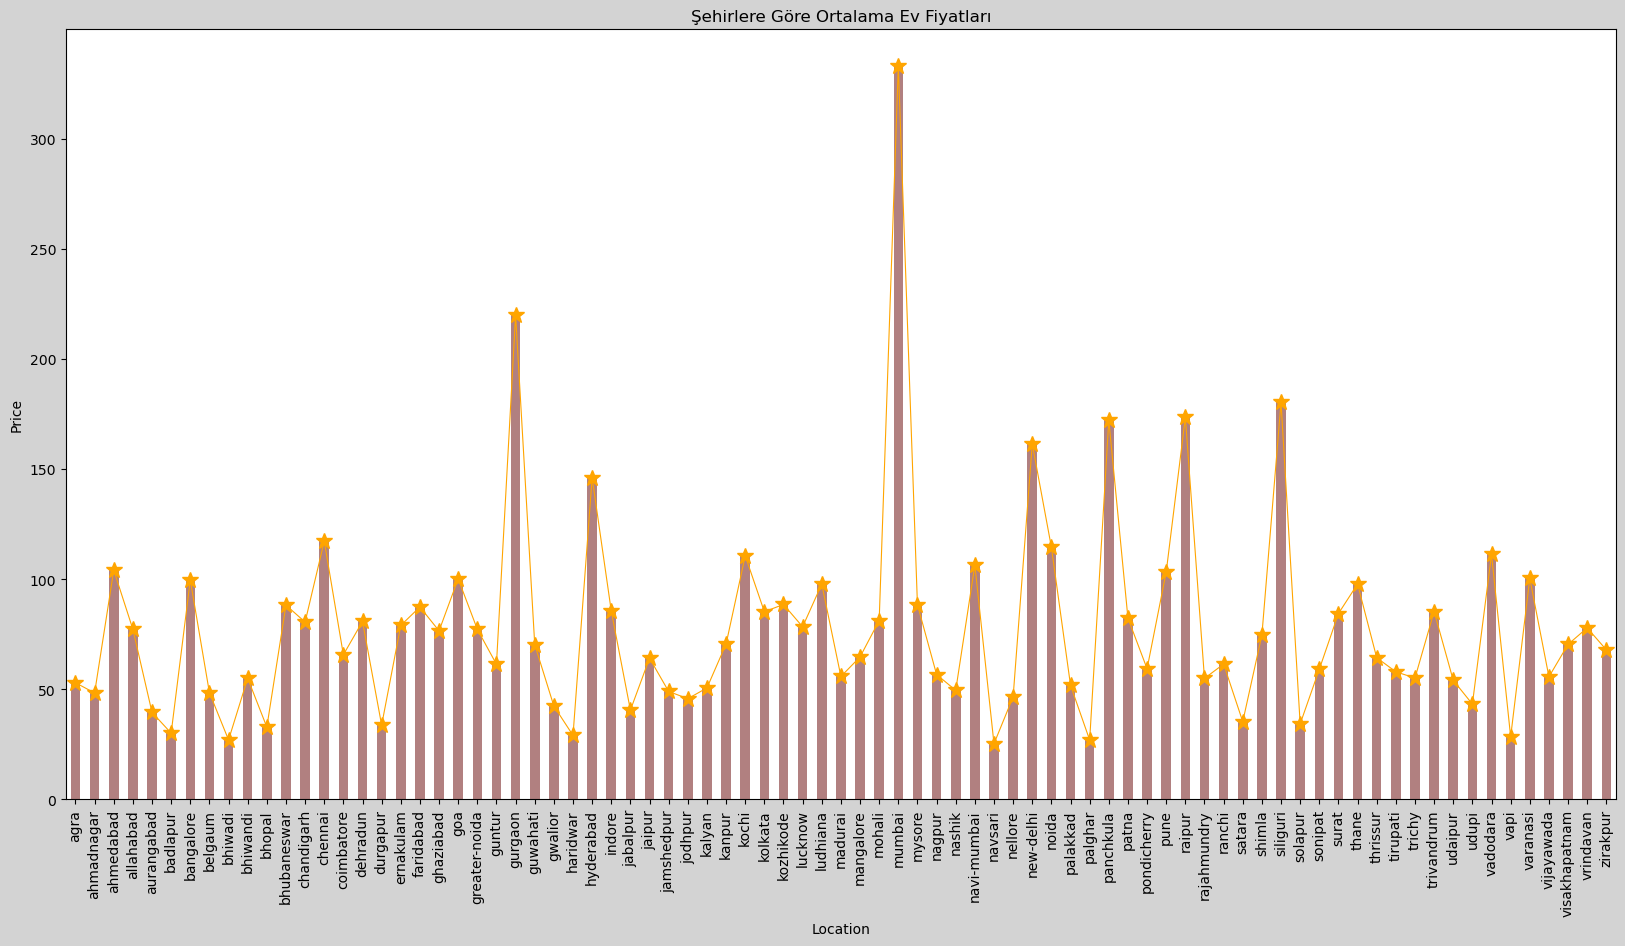

In [68]:
# Şehirlere göre ev fiyatlarının ortalama dağılımı

plt.figure(figsize=(20,10),facecolor='lightgrey')

#Location gruplaması eşliğinde ortalama fiyatlara göz atalım
df.groupby(by="location")["Price (lakh)"].mean().plot(kind="bar",color="#B18080")

# Veri setindeki genel dağılımı gösteren KDE grafiği
plt.plot(df.groupby(by="location")["Price (lakh)"].mean(),color="orange",
         linestyle="-",linewidth=0.8,marker="*",in_layout=False,markersize=12)

plt.xlabel("Location")
plt.ylabel("Price")
plt.title("Şehirlere Göre Ortalama Ev Fiyatları")

plt.show()

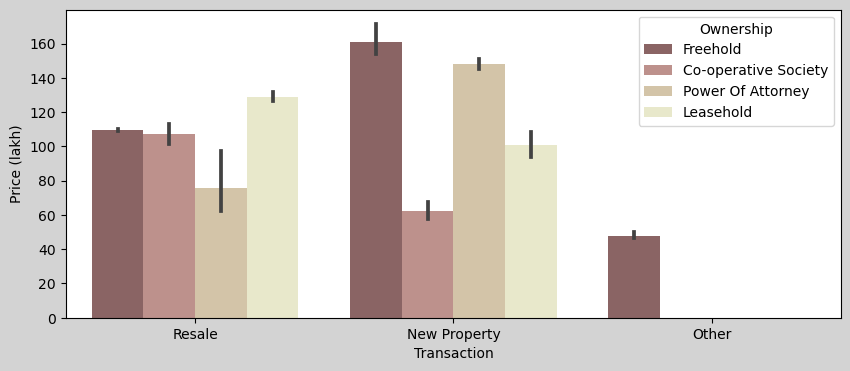

In [69]:
# Emlağın satılık - kiralık durumu ve sahip bilgisi arasındaki ilişki

plt.figure(figsize=(10,4),facecolor="lightgrey")

sbn.barplot(data=df,x="Transaction",y="Price (lakh)",estimator="mean",palette="pink",hue="Ownership")

plt.show()

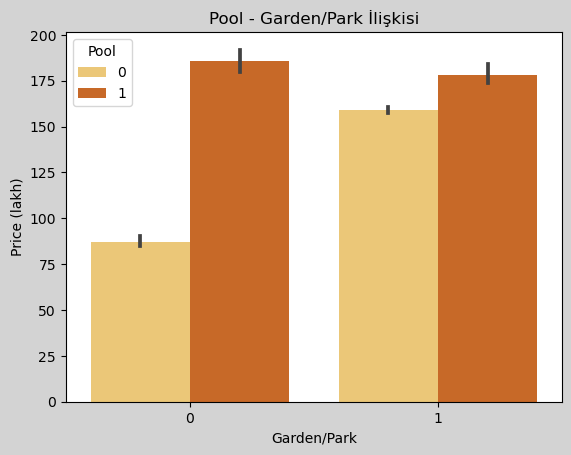

In [70]:
# Havuza sahip olma oranı ve Park/Bahçe sahip olma oranı arasındaki ilişki
plt.figure(facecolor="lightgrey")
sbn.barplot(data=df,x="Garden/Park",y="Price (lakh)",hue="Pool",palette="YlOrBr")

plt.title("Pool - Garden/Park İlişkisi")

plt.show()

## Data Modelling

Ev fiyatları analizi genellikle bir regresyon problemi olarak ele alınır, çünkü tahmin edilmek istenen değer (ev fiyatı) sürekli bir sayısal değerdir.

###### Kullanacağımız modeller nelerdir ? 

1- Linear Regression: Ev fiyatları analizi için basit bir başlangıç modeli olarak kullanılabilir.  
2- Ridge Regression: Aşırı uyumu (overfitting) azaltmak için L2 düzenlemesi kullanır. Ev fiyatları analizinde, çok sayıda bağımsız değişkenin olduğu durumlarda tercih edilebilir.  
3- Lasso Regression: Ridge regresyonuna benzer şekilde, Lasso regresyonu da aşırı uyumu azaltmak için düzenleme kullanır. Ancak, Lasso regresyonu L1 düzenlemesi kullanır ve bazı katsayıları tamamen sıfıra indirebilir. Bu, değişken seçimi için kullanışlı olabilir.   
4- Polynomial Regression:Polinomiyal Regresyon, doğrusal regresyonun genişletilmiş bir versiyonudur ve bağımsız değişkenlerle birlikte polinom terimlerini de içerebilir.Ancak, polinomiyal regresyon aşırı uydurmaya (overfitting) yatkın olabilir, yani model eğitim veri setine çok iyi uyarlanabilir ancak genelleme yapamayabilir. Bu nedenle, polinom derecesi gibi hiperparametrelerin doğru seçilmesi önemlidir.   
5- KNN Validation: KNN, veri setindeki benzer örneklerin ortalamasını alarak tahminler yapar. Bu nedenle, KNN ev fiyat tahmini gibi problemlerde kullanılabilir.
6-Decision Tree Regression: Karar ağaçları, ev fiyatları analizi gibi regresyon problemleri için de kullanılabilir. Karar ağaçları, verileri bir dizi karar kuralıyla bölerek ve her yaprağa bir tahmin değeri atayarak ev fiyatlarını tahmin eder.  
7-Random Forest Regression: Birden çok karar ağacının bir araya getirilmesiyle oluşturulan bir topluluk modelidir. Her bir ağaç farklı bir alt veri seti üzerinde eğitilir ve sonuçlarının ortalaması alınarak tahmin yapılır.  


#### Linear Regression

In [71]:
# Data üzerinde yer alan non-numeric veriler temizlenir.
numeric_df = df.select_dtypes(include=["int32","float64"])

In [72]:
from sklearn.model_selection import train_test_split

X = numeric_df.drop(columns="Price (lakh)",axis=1)
y = numeric_df['Price (lakh)']

# Train - test modeli oluşturulur.
# train : 0.8 - test : 0.2
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=10)


In [73]:
from sklearn.linear_model import LinearRegression

linear_regr = LinearRegression()

# Model eğitim setleri üzerinden fit edilir.
linear_regr.fit(X_train,y_train)

# predict
y_pred_linear= linear_regr.predict(X_test)

# Predict edilen model üzerinden actual ve predict değerleri karşılaştırılır. Hata oranları incelenir.

from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score,confusion_matrix

linear_mse = np.sqrt(mean_squared_error(y_test,y_pred_linear))
linear_r2 = r2_score(y_test,y_pred_linear)
linear_mae = mean_absolute_error(y_test,y_pred_linear)

print(f"""
MSE : {linear_mse} 
MAE : {linear_mae}
R2_Score : {linear_r2}
""")


MSE : 775.5923221040103 
MAE : 72.69217457963389
R2_Score : 0.00738402691693496



#### Feature Selection (EFS) & Ridge

In [74]:
# Öncelikle datamızı X ve y olarak bağımlı - bağımsız değişkenlerine ayırıyoruz.
X = numeric_df.drop(columns="Price (lakh)",axis=1)
y = numeric_df["Price (lakh)"]

In [75]:
# Ayırdığımız datamızı train-test-split ile test etmek için hazırlıyoruz.
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=10)


In [76]:
# Datamız içinde modele en uyumlu feature'ları bulabilmek için Feature selector modeli kuruyoruz.
from sklearn.linear_model import Ridge
from mlxtend.feature_selection import ExhaustiveFeatureSelector

# Alpha değeri 0'a yaklaştıkça linear_regression modeline yaklaşır.
ridge = Ridge(alpha=1,max_iter=1000) 

# Feature seçimi içinde efs modeli kurulur.
# Cv(cross-validation) = Veri setini rastgele alt gruplara böler ve bu alt gruplar üzerinde modeli eğitir.
efs = ExhaustiveFeatureSelector(estimator=ridge,cv=5, min_features=1, max_features=6,
                                scoring="neg_mean_squared_error", print_progress=True)



efs.fit(X_train,y_train)
print(efs.best_score_)
print(efs.best_idx_)
print(efs.best_feature_names_)


Features: 1485/1485

-50376.09141855702
(0, 2, 4, 5, 9, 10)
('Bathroom', 'Car Parking', 'Main Road', 'Garden/Park', 'Floor Location', 'Total Floors')


In [77]:
# Modele en iyi uyum sağlayan feature'lar seçilir.
X_train_selected=X_train.iloc[:,[0, 2, 4, 5, 9, 10]]
X_test_selected = X_test.iloc[:,[0, 2, 4, 5, 9, 10]]

X_train_selected
# Tekrar ridge modeli kurulur. Bu sefer en düşük validation error veren alpha değeri incelenir.

,Bathroom,Car Parking,Main Road,Garden/Park,Floor Location,Total Floors
71446,4,1,1,0,9,14
24135,2,1,1,1,4,5
161639,1,1,1,0,2,4
156246,2,1,1,1,1,4
28883,2,1,0,0,0,10
...,...,...,...,...,...,...
10099,1,2,1,1,8,12
119411,4,1,1,1,8,10
105934,1,1,0,1,4,35
107248,2,1,0,0,2,6


In [78]:
# Modeli tekrar kurmadan önce önce seçili feature'lar standardize edilir.Sonrasında model kurulur. 
# Model içerisinde öncelikli olarak işlem yapmak istediğimizde pipeline komutunu devreye sokabiliriz.

from sklearn.pipeline import make_pipeline 
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

alphas = 10**np.linspace(5,-2,100)*0.5
scoresCv = []

for lamb in alphas:
    pipe = make_pipeline(StandardScaler(),Ridge(alpha=lamb))
    
# Pipe ile önce standardize edilir. Ardından standardize edilmiş veriyi her bir için alpha değeri için fit ettirilir.
     
    scoreCv = cross_val_score(pipe,X_train_selected,y_train,
                              cv=KFold(n_splits=10,random_state=1,shuffle=True),
                              scoring="neg_mean_squared_error")
    
    # cv = Kfold değeri ile cross_validation yaparken train verisinin train ve validation olarak split edilmesi sağlanır.
    # Bu işlemi daha önce iki kere train_test_split alarak başarmıştık. 
    
    scoresCv.append([lamb,-1*np.mean(scoreCv)])

scoresCv_df = pd.DataFrame(data=scoresCv,columns=["Lamb Değeri" , "Validation Error"])
scoresCv_df

# Validation Error'u en düşük olam lambda değerini bulalım. Modelimizi bu lamda değeri üzerinden tekrardan kuralım.

,Lamb Değeri,Validation Error
0,50000.000000,50503.205450
1,42487.671795,50474.498984
2,36104.045092,50451.576405
3,30679.536367,50433.453045
4,26070.041440,50419.256893
...,...,...
95,0.009590,50374.180778
96,0.008149,50374.180778
97,0.006924,50374.180778
98,0.005884,50374.180778


In [79]:
print(scoresCv_df.sort_values(by='Validation Error'))
# En düşük validation error'a sahip alpha değeri

     Lamb Değeri  Validation Error
31    321.403656      50374.169048
30    378.231664      50374.169154
32    273.113861      50374.169469
29    445.107543      50374.170112
33    232.079442      50374.170199
..           ...               ...
4   26070.041440      50419.256893
3   30679.536367      50433.453045
2   36104.045092      50451.576405
1   42487.671795      50474.498984
0   50000.000000      50503.205450

[100 rows x 2 columns]


In [80]:
# Pipe ile yapmış olduğumuz standardizasyon işlemini manuel olarak yapalım.

from sklearn import preprocessing
#Standart scaler : standardizasyon 
# Sürece hazırlık 

scaler = preprocessing.StandardScaler()
# Standardizasyon

scaler.fit(X_train_selected)
# X_train_selected'e göre train edilir.

X_train_selected_Standard = scaler.transform(X_train_selected)
X_test_selected_Standard = scaler.transform(X_test_selected)
# X_train_selected'e göre fit edildikten sonra buna göre standize edilir.
# X_test_selected X_train_selected sete göre transform edilir. Standardize edilmiş X_train_selected_Standar'e göre değil.


In [150]:
ridge = Ridge(alpha=321.403656,max_iter=1000)

# Model eğitme
ridge.fit(X_train_selected_Standard,y_train)

#predict
y_pred_ridge = ridge.predict(X_test_selected_Standard)

ridge_mse = np.sqrt(mean_squared_error(y_test,y_pred_ridge))
ridge_r2 = r2_score(y_test,y_pred_ridge)
ridge_mae = mean_absolute_error(y_test,y_pred_ridge)

# Predict edilen model üzerinden actual ve predict değerleri karşılaştırılır. Hata oranları incelenir.

print(f"""
MSE : {ridge_mse} 
MAE : {ridge_mae}
R2_Score : {ridge_r2}
""")


MSE : 775.5931638120456 
MAE : 72.6723796439664
R2_Score : 0.007381872451837745



#### Feature Selection (SFS) & Lasso 

In [82]:
# Öncelikle datamızı X ve y olarak bağımlı - bağımsız değişkenlerine ayırıyoruz.
X = numeric_df.drop(columns="Price (lakh)",axis=1)
y = numeric_df["Price (lakh)"]

In [83]:
# Ayırdığımız datamızı train-test-split ile test etmek için hazırlıyoruz.
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=10)


In [147]:
# Datamız içinde modele en uyumlu feature'ları bulabilmek için Feature selector modeli kuruyoruz.
from sklearn.linear_model import Lasso
from mlxtend.feature_selection import SequentialFeatureSelector

# Alpha değeri 0'a yaklaştıkça linear_regression modeline yaklaşır.
lasso = Lasso(alpha=1,max_iter=1000) 

# Feature seçimi içinde sfs modeli kurulur.
# Cv(cross-validation) = Veri setini rastgele alt gruplara böler ve bu alt gruplar üzerinde modeli eğitir.
sfs = SequentialFeatureSelector(estimator=lasso,k_features=8, 
           forward=True, floating=False, verbose=2,scoring='neg_mean_squared_error',cv=10,n_jobs=1)


sfs.fit(X_train,y_train)
pd.DataFrame.from_dict(sfs.get_metric_dict()).T

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  11 out of  11 | elapsed:    1.2s finished

[2024-04-21 22:09:37] Features: 1/8 -- score: -51875.92861053232[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    1.9s finished

[2024-04-21 22:09:39] Features: 2/8 -- score: -50901.442681813285[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    2.1s finished

[2024-04-21 22:09:42] Features: 3/8 -- score: -50469.02500944444[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1

,feature_idx,cv_scores,avg_score,feature_names,ci_bound,std_dev,std_err
1,"(10,)","[-13523.240090380135, -15176.32876603862, -203...",-51875.928611,"(Total Floors,)",47743.403214,64282.443402,21427.481134
2,"(0, 10)","[-12764.705384036937, -14368.030789499877, -19...",-50901.442682,"(Bathroom, Total Floors)",47682.558183,64200.520727,21400.173576
3,"(0, 5, 10)","[-12328.957933442425, -13954.432505711575, -18...",-50469.025009,"(Bathroom, Garden/Park, Total Floors)",47687.961154,64207.795369,21402.598456
4,"(0, 5, 9, 10)","[-12261.82757855037, -13862.006376869154, -185...",-50397.238422,"(Bathroom, Garden/Park, Floor Location, Total ...",47691.839183,64213.016807,21404.338936
5,"(0, 2, 5, 9, 10)","[-12257.410677468613, -13852.368573718342, -18...",-50389.487934,"(Bathroom, Car Parking, Garden/Park, Floor Loc...",47691.228122,64212.194064,21404.064688
6,"(0, 2, 4, 5, 9, 10)","[-12256.27865114028, -13850.819446160795, -185...",-50389.105725,"(Bathroom, Car Parking, Main Road, Garden/Park...",47692.287972,64213.621063,21404.540354
7,"(0, 1, 2, 4, 5, 9, 10)","[-12256.27865114028, -13850.819446160795, -185...",-50389.105725,"(Bathroom, Balcony, Car Parking, Main Road, Ga...",47692.287972,64213.621063,21404.540354
8,"(0, 1, 2, 4, 5, 8, 9, 10)","[-12256.27865114028, -13850.819446160793, -185...",-50389.105725,"(Bathroom, Balcony, Car Parking, Main Road, Ga...",47692.287972,64213.621063,21404.540354


In [148]:
pd.DataFrame.from_dict(sfs.get_metric_dict()).T.sort_values('avg_score',ascending=False)

,feature_idx,cv_scores,avg_score,feature_names,ci_bound,std_dev,std_err
6,"(0, 2, 4, 5, 9, 10)","[-12256.27865114028, -13850.819446160795, -185...",-50389.105725,"(Bathroom, Car Parking, Main Road, Garden/Park...",47692.287972,64213.621063,21404.540354
7,"(0, 1, 2, 4, 5, 9, 10)","[-12256.27865114028, -13850.819446160795, -185...",-50389.105725,"(Bathroom, Balcony, Car Parking, Main Road, Ga...",47692.287972,64213.621063,21404.540354
8,"(0, 1, 2, 4, 5, 8, 9, 10)","[-12256.27865114028, -13850.819446160793, -185...",-50389.105725,"(Bathroom, Balcony, Car Parking, Main Road, Ga...",47692.287972,64213.621063,21404.540354
5,"(0, 2, 5, 9, 10)","[-12257.410677468613, -13852.368573718342, -18...",-50389.487934,"(Bathroom, Car Parking, Garden/Park, Floor Loc...",47691.228122,64212.194064,21404.064688
4,"(0, 5, 9, 10)","[-12261.82757855037, -13862.006376869154, -185...",-50397.238422,"(Bathroom, Garden/Park, Floor Location, Total ...",47691.839183,64213.016807,21404.338936
3,"(0, 5, 10)","[-12328.957933442425, -13954.432505711575, -18...",-50469.025009,"(Bathroom, Garden/Park, Total Floors)",47687.961154,64207.795369,21402.598456
2,"(0, 10)","[-12764.705384036937, -14368.030789499877, -19...",-50901.442682,"(Bathroom, Total Floors)",47682.558183,64200.520727,21400.173576
1,"(10,)","[-13523.240090380135, -15176.32876603862, -203...",-51875.928611,"(Total Floors,)",47743.403214,64282.443402,21427.481134


In [149]:
# Modele en iyi uyum sağlayan feature'lar seçilir.
X_train_selected=X_train.iloc[:,[0, 2, 4, 5, 9, 10]]
X_test_selected = X_test.iloc[:,[0, 2, 4, 5, 9, 10]]

X_train_selected
# Tekrar ridge modeli kurulur. Bu sefer en düşük validation error veren alpha değeri incelenir.

,Bathroom,Car Parking,Main Road,Garden/Park,Floor Location,Total Floors
71446,4,1,1,0,9,14
24135,2,1,1,1,4,5
161639,1,1,1,0,2,4
156246,2,1,1,1,1,4
28883,2,1,0,0,0,10
...,...,...,...,...,...,...
10099,1,2,1,1,8,12
119411,4,1,1,1,8,10
105934,1,1,0,1,4,35
107248,2,1,0,0,2,6


In [87]:
# Modeli tekrar kurmadan önce önce seçili feature'lar standardize edilir.Sonrasında model kurulur. 
# Model içerisinde öncelikli olarak işlem yapmak istediğimizde pipeline komutunu devreye sokabiliriz.

from sklearn.pipeline import make_pipeline 
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

alphas = 10**np.linspace(5,-2,100)*0.5
scoresCv = []

for lamb in alphas:
    pipe = make_pipeline(StandardScaler(),Lasso(alpha=lamb))
    
# Pipe ile önce standardize edilir. Ardından standardize edilmiş veriyi her bir için alpha değeri için fit ettirilir.
     
    scoreCv = cross_val_score(pipe,X_train_selected,y_train,
                              cv=KFold(n_splits=5,random_state=1,shuffle=True),
                              scoring="neg_mean_squared_error")
    
    # cv = Kfold değeri ile cross_validation yaparken train verisinin train ve validation olarak split edilmesi sağlanır.
    # Bu işlemi daha önce iki kere train_test_split alarak başarmıştık. 
    
    scoresCv.append([lamb,-1*np.mean(scoreCv)])

scoresCv_df = pd.DataFrame(data=scoresCv,columns=["Lamb Değeri" , "Lasso Validation Error"])
scoresCv_df

# Validation Error'u en düşük olam lambda değerini bulalım. Modelimizi bu lamda değeri üzerinden tekrardan kuralım.

,Lamb Değeri,Lasso Validation Error
0,50000.000000,53738.026547
1,42487.671795,53738.026547
2,36104.045092,53738.026547
3,30679.536367,53738.026547
4,26070.041440,53738.026547
...,...,...
95,0.009590,50373.664850
96,0.008149,50373.665198
97,0.006924,50373.664687
98,0.005884,50373.664621


In [88]:
print(scoresCv_df.sort_values(by='Lasso Validation Error'))
# En düşük validation error'a sahip alpha değeri 99

     Lamb Değeri  Lasso Validation Error
99      0.005000            50373.664574
98      0.005884            50373.664621
97      0.006924            50373.664687
95      0.009590            50373.664850
94      0.011285            50373.665032
..           ...                     ...
27    616.423370            53738.026547
26    725.414389            53738.026547
25    853.676324            53738.026547
22   1391.279701            53738.026547
0   50000.000000            53738.026547

[100 rows x 2 columns]


In [89]:
# Pipe ile yapmış olduğumuz standardizasyon işlemini manuel olarak yapalım.

from sklearn import preprocessing
#Standart scaler : standardizasyon 
# Sürece hazırlık 

scaler = preprocessing.StandardScaler()
# Standardizasyon

scaler.fit(X_train_selected)
# X_train_selected'e göre train edilir.

X_train_selected_Standard = scaler.transform(X_train_selected)
X_test_selected_Standard = scaler.transform(X_test_selected)
# X_train_selected'e göre fit edildikten sonra buna göre standize edilir.
# X_test_selected X_train_selected sete göre transform edilir. Standardize edilmiş X_train_selected_Standar'e göre değil.


In [151]:
lasso = Lasso(alpha=0.005000,max_iter=1000)

# Model eğitme
lasso.fit(X_train_selected_Standard,y_train)

#predict
y_pred_lasso = lasso.predict(X_test_selected_Standard)

lasso_mse = np.sqrt(mean_squared_error(y_test,y_pred_lasso))
lasso_r2 = r2_score(y_test,y_pred_lasso)
lasso_mae = mean_absolute_error(y_test,y_pred_lasso)

# Predict edilen model üzerinden actual ve predict değerleri karşılaştırılır. Hata oranları incelenir.

print(f"""
MSE : {lasso_mse} 
MAE : {lasso_mae}
R2_Score : {lasso_r2}
""")


MSE : 775.5918468321923 
MAE : 72.67390025665767
R2_Score : 0.007385243438141065



#### Polynomial Regression

In [91]:
from sklearn.model_selection import train_test_split

In [92]:
numeric_corr_index = df.select_dtypes(include=["int32","float64"]).corr()["Price (lakh)"].sort_values(ascending=False).nlargest(7).index
numeric_corr_df = df[numeric_corr_index]


In [93]:
X = numeric_corr_df.drop(columns="Price (lakh)",axis=1)
y = numeric_corr_df['Price (lakh)']

In [94]:
# Train - test modeli oluşturulur.
# train : 0.8 - test : 0.2
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=10)

In [95]:
# Train - test modeli ardından train modeli tekrar split edilir. Validation modeli oluşturulur.
# train : 0.5 - validation : 0.5
X_trainV,X_valid,y_trainV,y_valid = train_test_split(X_train,y_train,test_size=0.5,random_state=10)

# Validation en uygun poly-degree bulmak için hazırlanır.

In [96]:
#Kütüphaneleri ekliyoruz.
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [97]:
# PolynomialFeatures : modeli polynomial olarak derecelendirmeye yarar.
for x in range(1,7):
    poly_features = PolynomialFeatures(degree=x , include_bias=False)

    X_trainV_poly = poly_features.fit_transform(X_trainV)
    X_valid_poly = poly_features.fit_transform(X_valid)
    
    
    # Öncelikli olarak linear regression modeli oluşturulur.Model Polynomial features degree'sine göre fit ettirilir.
    poly_model = LinearRegression()
    poly_model.fit(X_trainV_poly,y_trainV)
    
    #Predict aşaması.
    
    y_trainV_predicted = poly_model.predict(X_trainV_poly)
    y_valid_predicted = poly_model.predict(X_valid_poly)
    
    #mean_squared_error
    
    mse_train = mean_squared_error(y_trainV,y_trainV_predicted)
    mse_valid = mean_squared_error(y_valid,y_valid_predicted)
    
    d={"mse_train":mse_train,"mse_valid":mse_valid}
    validation_df = pd.DataFrame(data=d,index=[x])
    
    # DataFrame'i yazdırma
    print(validation_df["mse_valid"])

1    16089.15428
Name: mse_valid, dtype: float64
2    15262.710371
Name: mse_valid, dtype: float64
3    14491.121512
Name: mse_valid, dtype: float64
4    15456.673552
Name: mse_valid, dtype: float64
5    446330.243286
Name: mse_valid, dtype: float64
6    1.131938e+06
Name: mse_valid, dtype: float64


En düşük validation değerinin degree=3'te olduğunu gözlemledik. Modeli tekrar düzenleyelim.

In [99]:
poly_features = PolynomialFeatures(degree=3,include_bias=False)

X_train_poly = poly_features.fit_transform(X_train)
X_test_poly = poly_features.fit_transform(X_test)
# X_train PolynomialFeatures(degree=3)'ye fit_transform edilir.
# X_test 3.Dereceden polinomu alınmış model üzerine fit_transform edilir.

# Yani X_train ve X_test'in 3.Dereceden polinomu

poly_model = LinearRegression()
poly_model.fit(X_train_poly,y_train)
# Model oluşturulur.
# 3.Dereceden polinomu alınmış X_train ve y_train'e göre fit edilir.

y_test_predict= poly_model.predict(X_test_poly)
# 3.Dereceden polinomu alınmış X_test_poly'e göre predict alınır.

poly_mse= np.sqrt(mean_squared_error(y_test,y_test_predict))
poly_mae = mean_absolute_error(y_test,y_test_predict)
poly_r2 = r2_score(y_test,y_test_predict)

print(f"""
MSE : {poly_mse}
MAE : {poly_mae}
R2_Score : {poly_r2}

""")


# Validation'dan elde ettiğimiz sonuc bize Validaiton Error'un en düşük olduğu polinom features(degree=3) modeline yönlendirdi


MSE : 775.3424073191838
MAE : 69.96081452628513
R2_Score : 0.008023614064072482




#### KNN Validation

In [100]:
# Data üzerinde yer alan non-numeric veriler temizlenir.
numeric_df = df.select_dtypes(include=["int32","float64"])

In [101]:
from sklearn.model_selection import train_test_split

X = numeric_df.drop(columns="Price (lakh)",axis=1)
y = numeric_df['Price (lakh)']

# Train - test modeli oluşturulur.
# train : 0.8 - test : 0.2
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=10)


In [102]:
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsRegressor

In [ ]:
Cv_accuary = []

# Veri pipeline ile önce standardize edilir, sonra Kneighbours modellemesi üzerine yerleştirilir.

for j in range(1,10):
    pipe = make_pipeline(StandardScaler(),KNeighborsRegressor(n_neighbors=j))
    
    scoreCv = cross_val_score(pipe, X_train, y_train, 
                            cv=KFold(n_splits=5,shuffle=True,random_state=1),
                            scoring="neg_mean_squared_error")
    
    # cv = Kfold ile train verisi train ve valid olarak ikiye ayrılır.
    
    Cv_accuary.append([j,-1*np.mean(scoreCv)])
    
Cv_accuary_df = pd.DataFrame(data=Cv_accuary,columns=["Neighborsize","Validation Accuary" ])

In [ ]:
Cv_accuary_df.sort_values(by="Validation Accuary")

# En düşük validation değerine sahip 

In [106]:
# Pipe ile yapmış olduğumuz standardizasyon işlemini manuel olarak yapalım.

from sklearn import preprocessing
#Standart scaler : standardizasyon 
# Sürece hazırlık 

scaler = preprocessing.StandardScaler()
# Standardizasyon

scaler.fit(X_train)
# X_train'e göre train edilir.

X_train_Standard = scaler.transform(X_train)
X_test_Standard = scaler.transform(X_test)
# X_train'e göre fit edildikten sonra buna göre standize edilir.


In [107]:
# En düşük validation error'a Neighborsize = 7 iken ulaşılmıştır.
knn = KNeighborsRegressor(n_neighbors=7)

# Model eğitimi
knn.fit(X_train_Standard,y_train)

# predict
y_test_predict = knn.predict(X_test_Standard)

# score
knn_mse= np.sqrt(mean_squared_error(y_test,y_test_predict))
knn_mae = mean_absolute_error(y_test,y_test_predict)
knn_r2 = r2_score(y_test,y_test_predict)

print(f"""
MSE : {knn_mse}
MAE : {knn_mae}
R2_Score : {knn_r2}

""")




MSE : 772.6665938188462
MAE : 25.274942740915463
R2_Score : 0.01485869370721149




#### Decision Tree Regression

Karar ağaçları modelinde standardizasyon ve feature selection'a gerek yoktur. Model kendi karar verir.

In [110]:
from sklearn.tree import DecisionTreeRegressor,plot_tree
from sklearn.model_selection import GridSearchCV

In [242]:
# Grid Search, farklı hiperparametre kombinasyonlarını deneyerek en iyi modeli bulmaya yardımcı olan bir tekniktir. 
# Decision Tree modelinde Grid Search kullanmanın amacı, modelin performansını artırmak ve overfitting'i azaltmak için en iyi hiperparametre değerlerini bulmaktır. 

decision_tree_regr = DecisionTreeRegressor()
# Modelimizi seçelim.

alphas = np.linspace(0,1,num=100)
# Modele ait parametreleri girelim.
params = {'max_depth': [2, 5],'ccp_alpha': alphas}

# Grid search ile modele ait en uygun parametreleri bulalım.

grid = GridSearchCV(estimator=decision_tree_regr,
                    cv=KFold(n_splits=10,random_state=1,shuffle=True),
                    param_grid=params,
                    scoring="neg_mean_squared_error")

grid.fit(X_train,y_train)

# En iyi parametreleri ve en iyi skoru yazdırma
print("En iyi parametreler:", grid.best_params_)
print("En iyi skor:", grid.best_score_)


En iyi parametreler: {'ccp_alpha': 0.08080808080808081, 'max_depth': 5}
En iyi skor: -41569.579475276914


Modelimizi tekrardan ccp_alpha: 0.08080808080808081, max_depth: 5 şeklinde oluşturabiliriz

In [117]:
decision_tree_regr = DecisionTreeRegressor(ccp_alpha= 0.08080808080808081, max_depth=5)
decision_tree_regr.fit(X_train,y_train)
y_pred = decision_tree_regr.predict(X_test)

# score 

tree_mse= np.sqrt(mean_squared_error(y_test,y_pred))
tree_mae = mean_absolute_error(y_test,y_pred)
tree_r2 = r2_score(y_test,y_pred)

print(f"""
MSE : {tree_mse}
MAE : {tree_mae}
R2_Score : {tree_r2}


""")






MSE : 769.9977537465031
MAE : 41.913669067314025
R2_Score : 0.02165242318864602





In [108]:
from sklearn import tree
from sklearn.tree import plot_tree

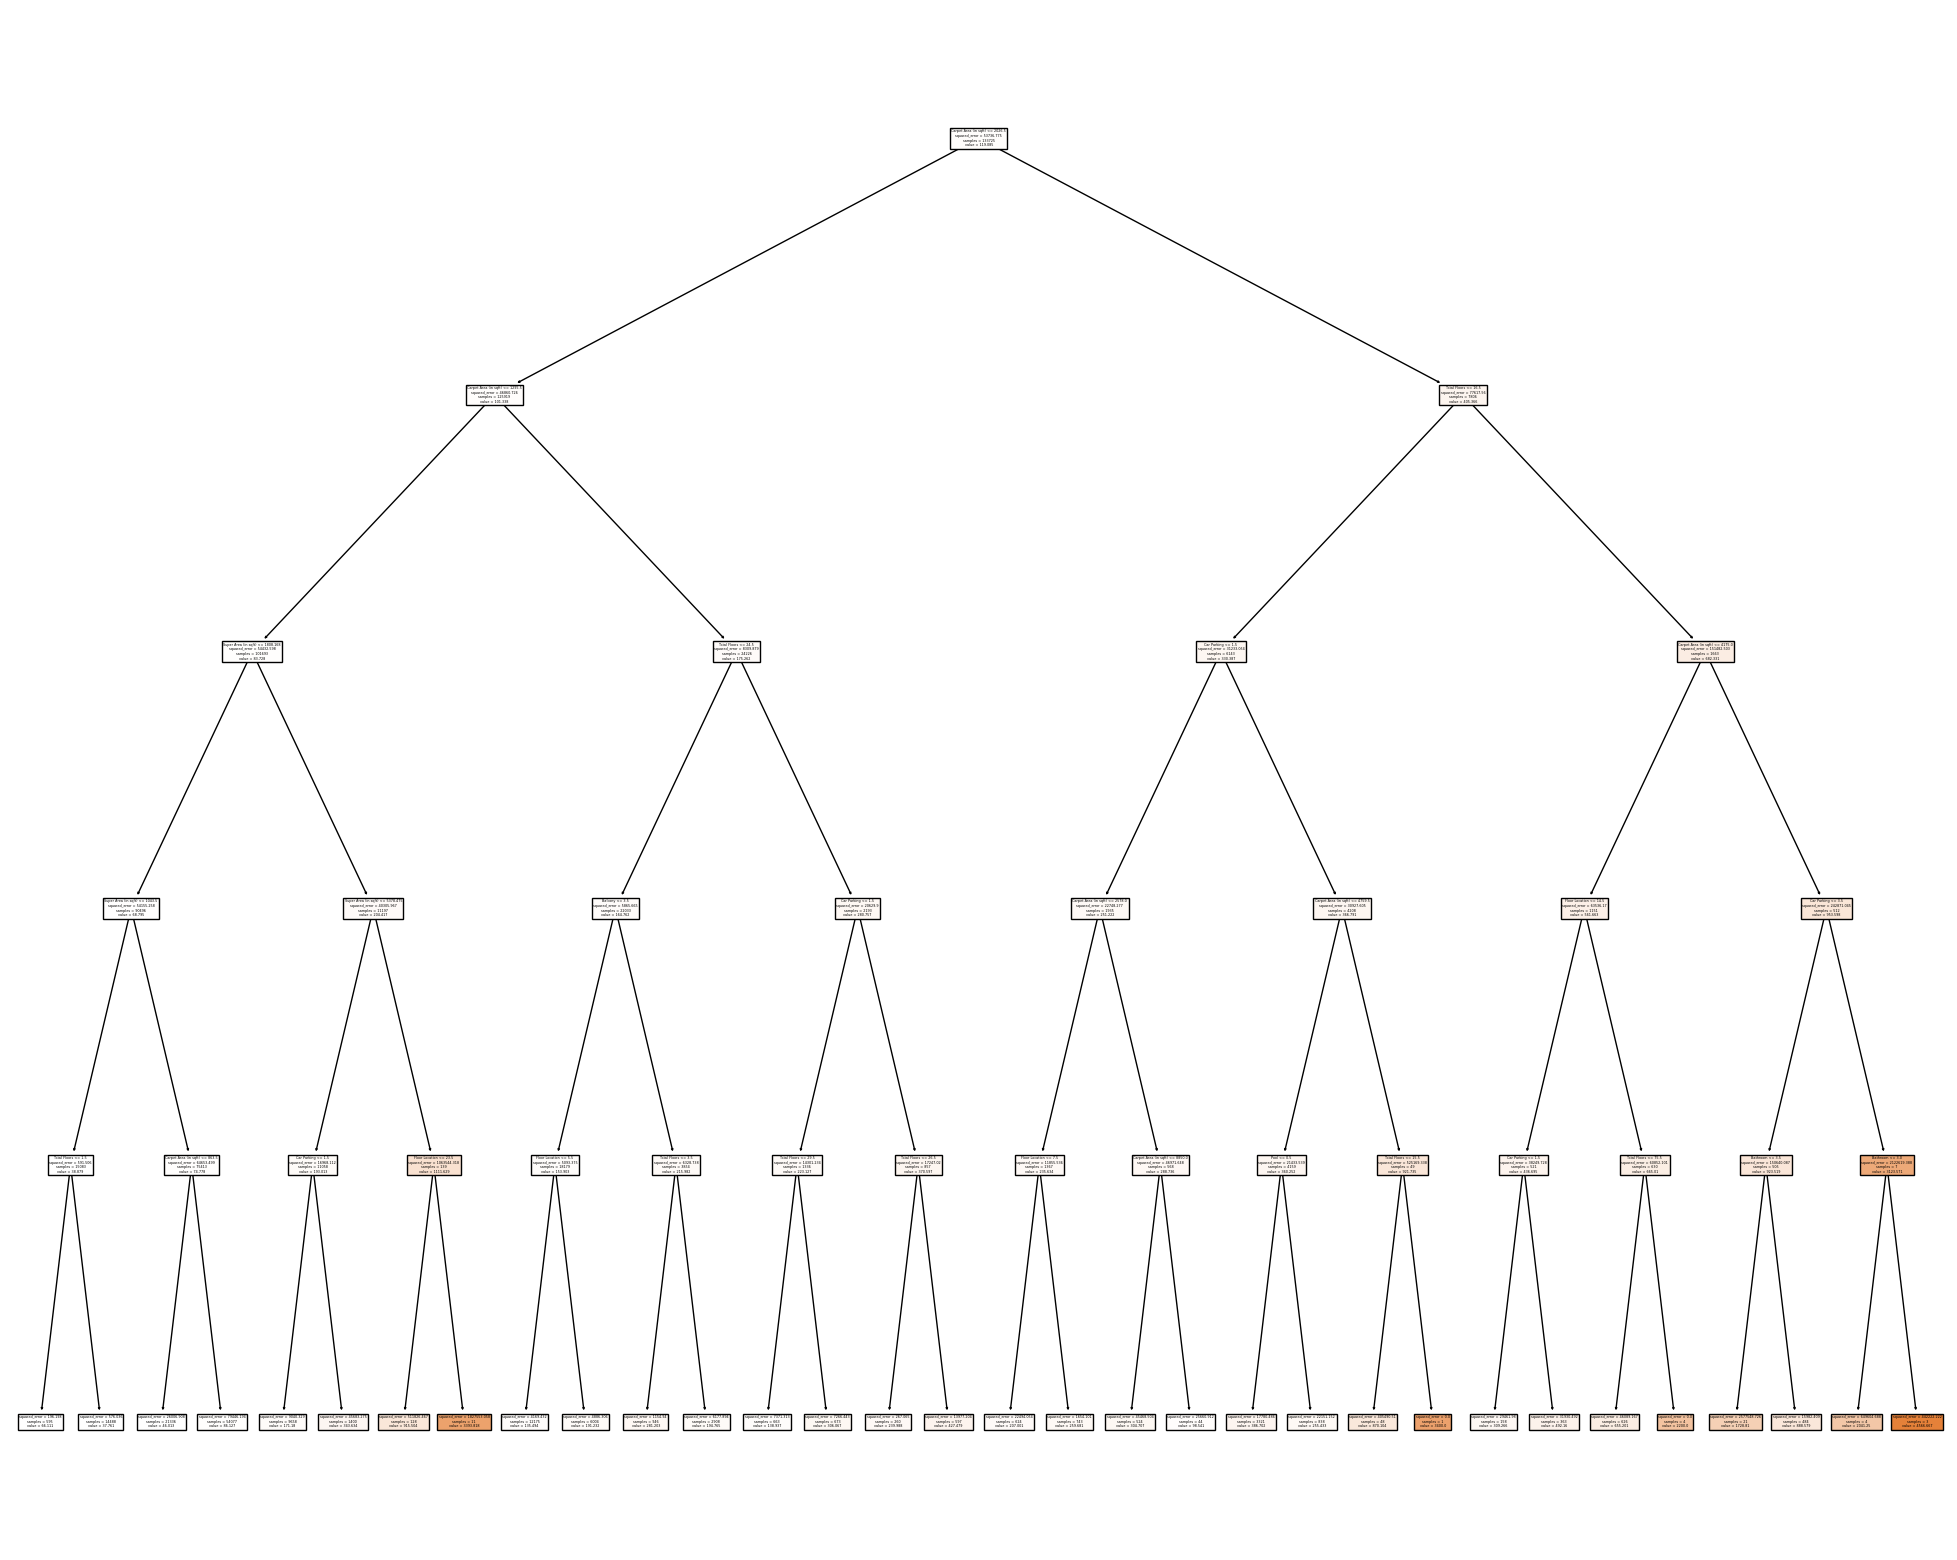

In [256]:
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(decision_tree_regr, feature_names=['Bathroom', 'Balcony', 'Car Parking', 'Carpet Area (in sqft)',
       'Main Road', 'Garden/Park', 'Pool', 'Super Area (in sqft)',
       'Cover Parking', 'Floor Location', 'Total Floors'], filled=True)

#### Random Forest Regression

In [111]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import Pipeline


# rastgele ağaç sayısı
n_estimators = [100, 200, 300]
# her kesimdeki özellik sayısı 
max_features = [1, 2, 3, 4, 5]

params = {
 'randomforestregressor__n_estimators': n_estimators,
 'randomforestregressor__max_features': max_features,
 }

pipe = Pipeline([('standardscaler', StandardScaler()), ('randomforestregressor', RandomForestRegressor(random_state=0))])

grid = GridSearchCV(estimator=pipe, param_grid=params,
                    cv=KFold(n_splits=5, random_state=1, shuffle=True),
                    verbose=2, 
                    scoring='neg_mean_squared_error',
                    n_jobs=-1)

# Modeli fit ettirelim.
grid.fit(X_train, y_train)

print(grid.best_params_)

Fitting 5 folds for each of 15 candidates, totalling 75 fits


KeyboardInterrupt: 

In [112]:
#Modelimizi tekrar kurabiliriz.

forest=RandomForestRegressor(random_state=0,n_estimators=100,max_features=1)


forest.fit(X_train_Standard,y_train)
y_pred=forest.predict(X_test_Standard)

forest_mse= np.sqrt(mean_squared_error(y_test,y_pred))
forest_mae = mean_absolute_error(y_test,y_pred)
forest_r2 = r2_score(y_test,y_pred)


print(f"""
MSE : {forest_mse}
MAE : {forest_mae}
R2_Score : {forest_r2}

""")



MSE : 768.6032194864739
MAE : 18.925115420130087
R2_Score : 0.025192962723352363




In [184]:
score = {"Mean Square Error" : [linear_mse,ridge_mse,lasso_mse,poly_mse,knn_mse,tree_mse,forest_mse],
"Mean Absolute Error": [linear_mae,ridge_mae,lasso_mae,poly_mae,knn_mae,tree_mae,forest_mae],
"R2_Score" : [linear_r2,ridge_r2,lasso_r2,poly_r2,knn_r2,tree_r2,forest_r2]}


modelling = pd.DataFrame(data = score , index = ["Linear Regression","Ridge Regression","Lasso Regression",
                                                   "Polynomial Regression","KNN Validation","Decision Tree Regression",
                                                   "Random Forest Regression"])

modelling.sort_values(by="R2_Score",ascending=False)

,Mean Square Error,Mean Absolute Error,R2_Score
Random Forest Regression,768.603219,18.925115,0.025193
Decision Tree Regression,769.997754,41.913669,0.021652
KNN Validation,772.666594,25.274943,0.014859
Polynomial Regression,775.342407,69.960815,0.008024
Lasso Regression,775.591847,72.673900,0.007385
Linear Regression,775.592322,72.692175,0.007384
Ridge Regression,775.593164,72.672380,0.007382


Modeli incelediğimizde en düşük mse verisi ve en yüksek r2_score Random Forest Regression'a aittir.
En iyi doğruluk oranına sahip veri olarak yorumlayabiliriz.

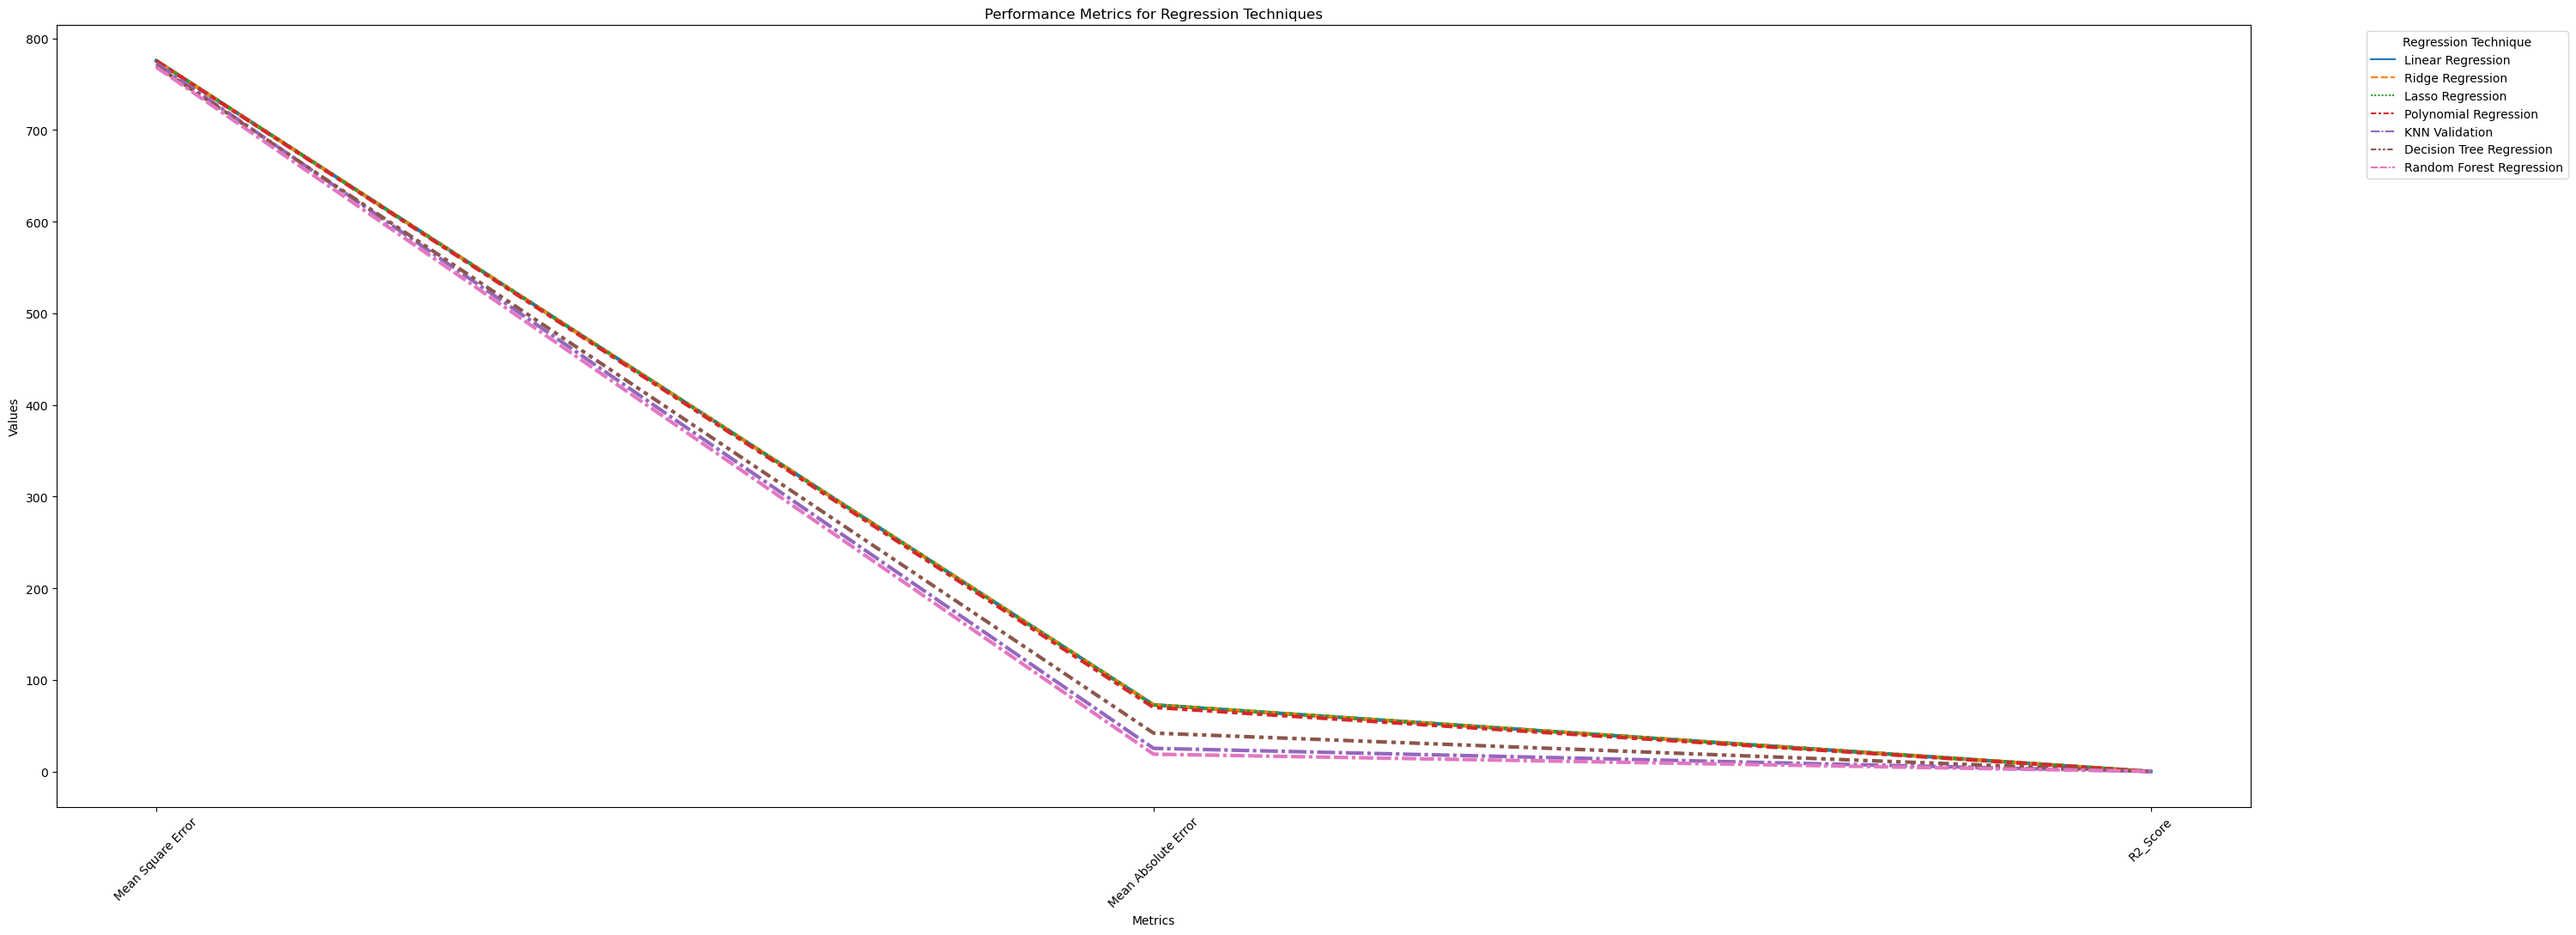

In [247]:
import seaborn as sbn
import matplotlib.pyplot as plt

# Set the figure size
plt.figure(figsize=(30,11))

# Plot for Mean Square Error
sbn.lineplot(data=modelling.transpose(), markers=False,linewidth=3,dashes=True)

# Add labels and title
plt.xlabel('Metrics')
plt.ylabel('Values')
plt.title('Performance Metrics for Regression Techniques')
plt.legend(title='Regression Technique', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

In [240]:
modelling["Mean Square Error"].values

array([775.5923221 , 775.59316381, 775.59184683, 775.34240732,
       772.66659382, 769.99775375, 768.60321949])

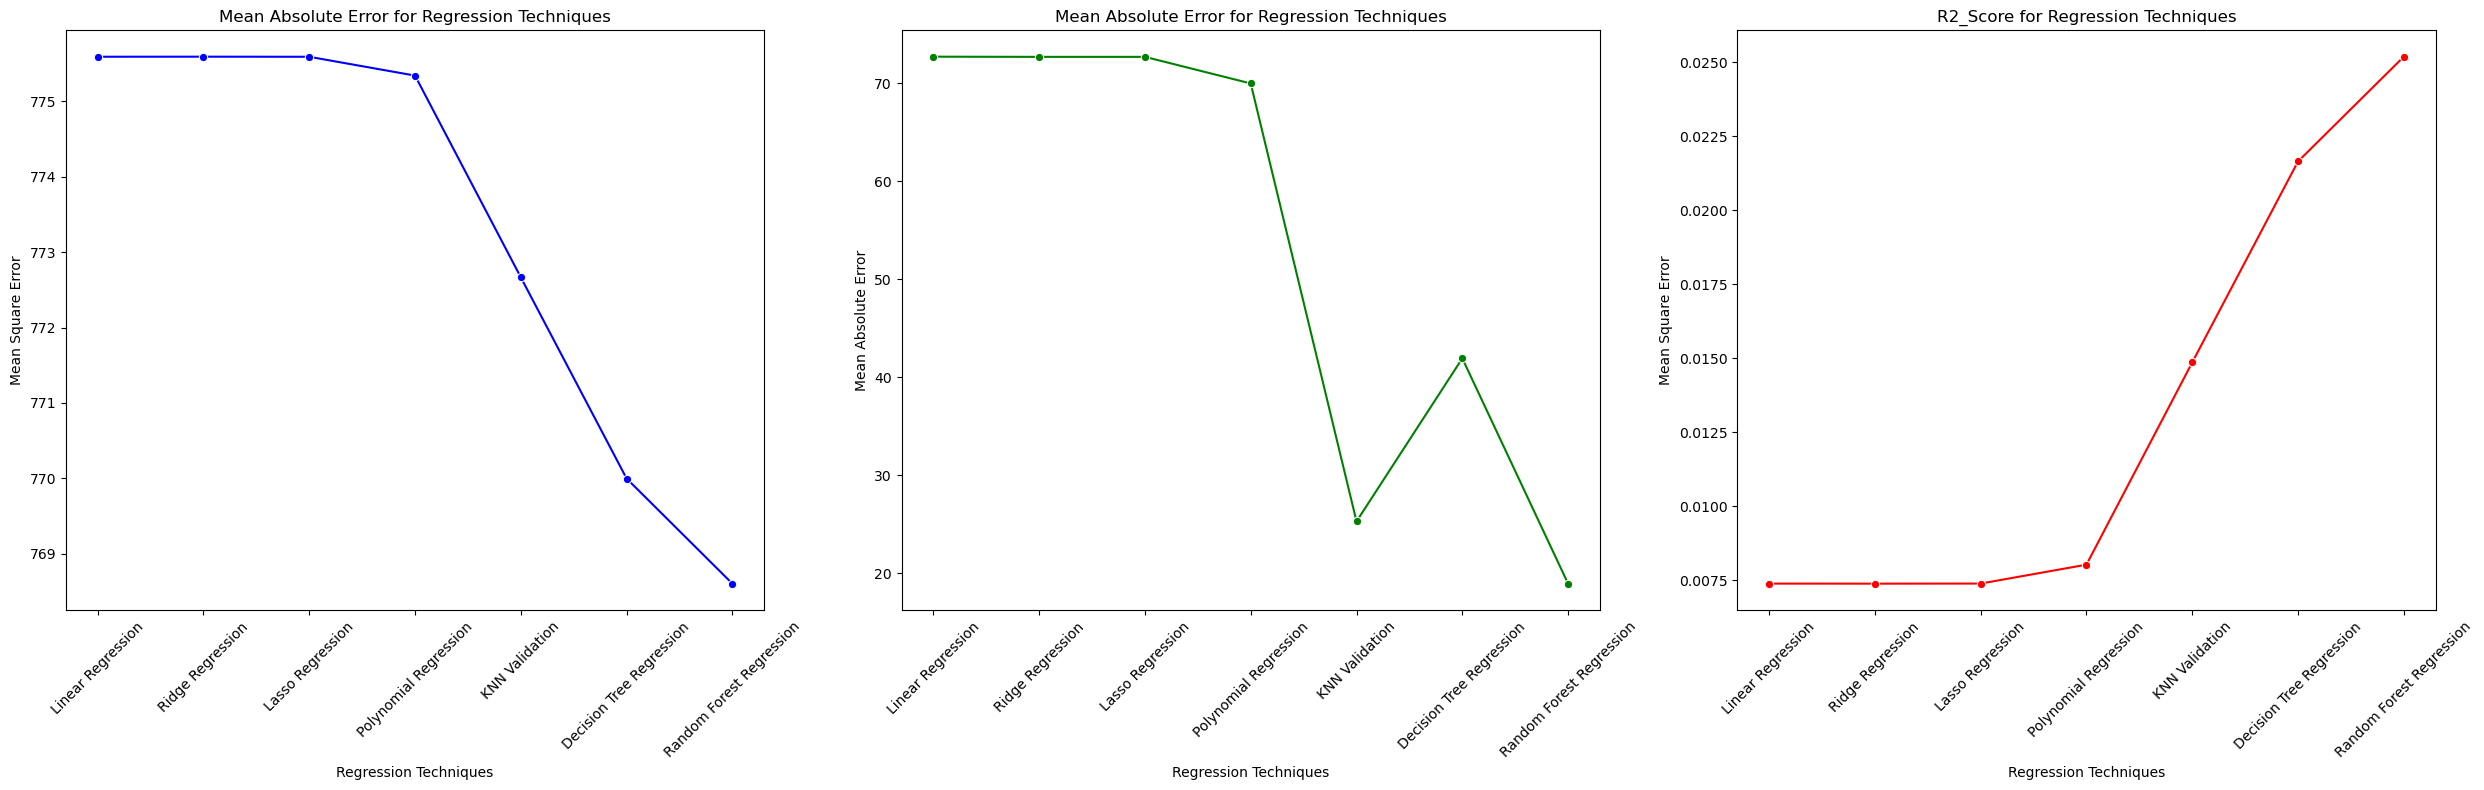

In [267]:
plt.figure(figsize=(25, 8))

# Plot line chart for Mean Square Error
plt.subplot(1,3,1)
sbn.lineplot(data=modelling['Mean Square Error'], marker='o', color='b')

plt.xlabel('Regression Techniques')
plt.ylabel('Mean Square Error')
plt.title('Mean Absolute Error for Regression Techniques')
plt.xticks(rotation=45) 

plt.subplot(1,3,2)
sbn.lineplot(data=modelling['Mean Absolute Error'], marker='o', color='g')

plt.xlabel('Regression Techniques')
plt.ylabel('Mean Absolute Error')
plt.title('Mean Absolute Error for Regression Techniques')
plt.xticks(rotation=45) 

plt.subplot(1,3,3)
sbn.lineplot(data=modelling['R2_Score'], marker='o', color='r')

plt.xlabel('Regression Techniques')
plt.ylabel('Mean Square Error')
plt.title('R2_Score for Regression Techniques')
plt.xticks(rotation=45) 

plt.tight_layout()
plt.show()





In [268]:
# Modeli tanımlama
forest = RandomForestRegressor(random_state=0, n_estimators=100, max_features=1)

# Modeli eğitme
forest.fit(X, y)

# Modeli kullanarak tahmin yapma
y_pred = forest.predict(X)

# Model performansını değerlendirme
forest_mse = np.sqrt(mean_squared_error(y, y_pred))
forest_mae = mean_absolute_error(y, y_pred)
forest_r2 = r2_score(y, y_pred)

print(f"""
MSE : {forest_mse}
MAE : {forest_mae}
R2 Score : {forest_r2}
""")


MSE : 124.83230723915175
MAE : 6.939342514323007
R2 Score : 0.905096073026602

